<a href="https://colab.research.google.com/github/CristianVeloz0501/DMC/blob/main/Housing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Importar datos

In [ ]:
Data = pd.read_csv('/content/HousingData 2.csv',encoding='latin1')

# Exploracion de datos

Se puede usar el head, sample, tail para observar valores de la tabla

In [ ]:
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
Data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
Data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
394,NaN,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
453,8.24809,0.0,NaN,0.0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
Data.shape

(506, 14)

In [ ]:
DataT=Data.transpose()

In [ ]:
DataT

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,NaN,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,...,0.5850,0.58500,0.58500,0.58500,0.58500,0.57300,0.57300,0.57300,0.57300,0.57300
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400,...,5.3900,5.79400,6.01900,5.56900,6.02700,6.59300,6.12000,6.97600,6.79400,6.03000
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000,...,72.9000,70.60000,65.30000,73.50000,79.70000,69.10000,76.70000,91.00000,89.30000,NaN
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210,...,2.7986,2.89270,2.40910,2.39990,2.49820,2.47860,2.28750,2.16750,2.38890,2.50500
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000,...,6.0000,6.00000,6.00000,6.00000,6.00000,1.00000,1.00000,1.00000,1.00000,1.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000,...,391.0000,391.00000,391.00000,391.00000,391.00000,273.00000,273.00000,273.00000,273.00000,273.00000


In [ ]:
Data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
DataT.describe()

In [ ]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


# Ordenamiento

In [ ]:
Dataord=Data.sort_values(by=['CRIM'],ascending=False)
Dataord

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,0.0,18.1,0.0,0.597,6.852,100.0,1.4655,24,666,20.2,179.36,19.78,27.5
426,NaN,0.0,18.1,0.0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2
430,NaN,0.0,18.1,0.0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5
460,NaN,0.0,18.1,0.0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4


# Analisis con graficos

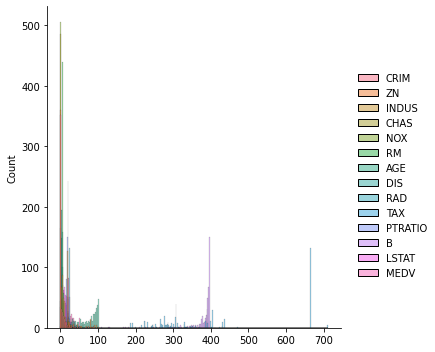

In [ ]:
sbn.displot(Data)
plt.show()


Poner limites 

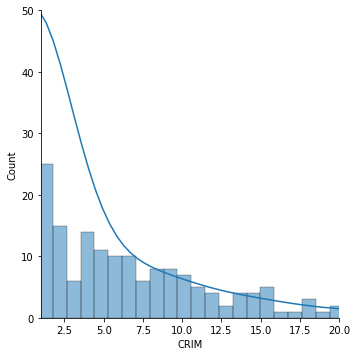

In [ ]:
sbn.displot(Data['CRIM'],kde=True)
plt.xlim(1,20)
plt.ylim(0,50)
plt.show()

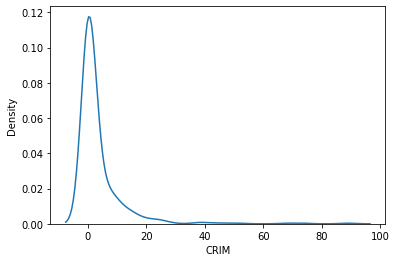

In [ ]:
sbn.kdeplot(Data['CRIM'])

plt.show()

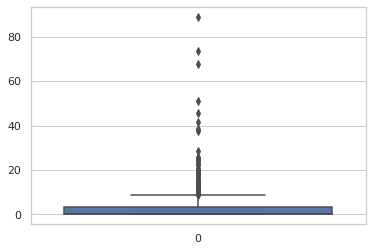

In [ ]:
sbn.set_theme(style="whitegrid")
ax = sbn.boxplot(data=Data.CRIM, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


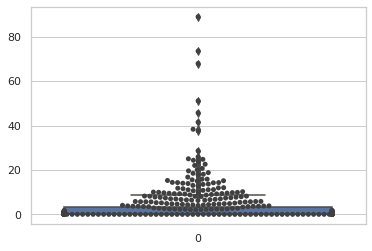

In [ ]:
ax = sbn.boxplot(data=Data.CRIM, orient="v")
ax = sbn.swarmplot(data=Data.CRIM, color=".25")